# What is CNN ?


#### A CNN is a neural network that typically contains several types of layers, which includes :-

* convolutional layer 
* pooling layer, and 
* activation layer.

## Convolutional Layer

* To understand what a CNN is, you need to understand how convolutions work. 

* Imagine you have an image represented as a 5x5 matrix of values, and you take a 3x3 matrix and slide that 3x3 window around the image. 

* At each position the 3x3 visits, you matrix multiply the values of your 3x3 window by the values in the image that are currently being covered by the window. 

* This results in a single number the represents all the values in that window of the image. 

Here’s a gif for clarity:

![Conv Gif](./Data/conv.gif)

## Level - 1 - Code the Convolutional Layer


![Detailed Conv Gif](./Data/conv_detailed.gif)

### Question 1

In [614]:
# Write a function which does the convolution.
# Code for a 3d Matrix
# Before writing out code, write function header with parameters and get it reviewed by Mentors

### importing required packages

In [615]:
import numpy as np
from math import ceil

### Creating feature_2d and kernel to work with locally

In [2]:
feature_2d = np.array([
     [0]*7,
     [0,2,2,1,2,2,0],
     [0,2,1,2,0,2,0],
     [0,2,2,0,2,2,0],
     [0,1,2,2,2,1,0],
     [0,2,1,1,0,2,0],
     [0]*7     
 ])
kernel = np.array([
    [0,-1,-1],
    [-1,0,-1],
    [-1,1,0]
])

### Function to extract patches from 2d layer

In [616]:
def patch_from_2d(feature_2d, kernel_shape, rstride, cstride):
    ## input paramaters
    ## feature_2d - 2d feature map
    ## kernel_shape - shape of the input kernel
    
    ## rows and cols in feature_2d
    feature_row, feature_col = feature_2d.shape
    
    ## kernel row and kernel col
    k_row, k_col = kernel_shape
    
    ## starting point in feature_2d
    row,col = 0,0
    
    patches = []
    while(row<=feature_row-k_row):
        while(col<=feature_col-k_col):
            #print('patch with row and col as',row,col)
            patch = feature_2d[row:row+k_row,col:col+k_col]
            #print(patch)
            
            patches.append(patch)
            col+=cstride
        row+=rstride
        col=0
    return patches

### First gif values stored locally

In [617]:
feature_gif1 = np.array([[1,1,1,0,0],
        [0,1,1,1,0],
        [0,0,1,1,1],
        [0,0,1,1,0],
        [0,1,1,0,0]
])
kernel_gif1 = np.array([
    [1,0,1],
    [0,1,0],
    [1,0,1]
])

### Checking function 

In [620]:
(patch_from_2d(feature_gif1, kernel_gif1.shape,1,1))

[array([[1, 1, 1],
        [0, 1, 1],
        [0, 0, 1]]), array([[1, 1, 0],
        [1, 1, 1],
        [0, 1, 1]]), array([[1, 0, 0],
        [1, 1, 0],
        [1, 1, 1]]), array([[0, 1, 1],
        [0, 0, 1],
        [0, 0, 1]]), array([[1, 1, 1],
        [0, 1, 1],
        [0, 1, 1]]), array([[1, 1, 0],
        [1, 1, 1],
        [1, 1, 0]]), array([[0, 0, 1],
        [0, 0, 1],
        [0, 1, 1]]), array([[0, 1, 1],
        [0, 1, 1],
        [1, 1, 0]]), array([[1, 1, 1],
        [1, 1, 0],
        [1, 0, 0]])]

### function for 2d convolution

In [621]:
def convolve_2d_layer(feature_2d, kernel, rstride, cstride):
    
    out_row = ceil(float(feature_2d.shape[0] - kernel.shape[0] + 1) / float(rstride))
    out_col = ceil(float(feature_2d.shape[1] - kernel.shape[1] + 1) / float(cstride))
    
    patches = patch_from_2d(feature_2d, kernel.shape, rstride, cstride)
    convole_out = []
    for patch in patches:
        convole_out.append(np.sum(patch*kernel))
    return np.array(convole_out).reshape(out_row,out_col)   

In [622]:
convolve_2d_layer(feature_gif1, kernel_gif1,1,1)

array([[4, 3, 4],
       [2, 4, 3],
       [2, 3, 4]])

### Storing variables to work with 3d convolution with multiple filter layer

### Storing input feature

In [623]:
input_feature = np.array([
    [[0,0,0,0,0,0,0],
     [0,1,2,2,2,0,0],
     [0,2,1,1,0,0,0],
     [0,2,0,1,0,2,0],
     [0,1,2,2,1,1,0],
     [0,0,0,0,1,2,0],
     [0,0,0,0,0,0,0]],
    
    [[0,0,0,0,0,0,0],
     [0,1,2,2,1,1,0],
     [0,1,0,0,2,1,0],
     [0,2,0,2,1,0,0],
     [0,1,0,1,0,0,0],
     [0,2,2,1,0,1,0],
     [0,0,0,0,0,0,0]],
    
    [[0,0,0,0,0,0,0],
     [0,2,2,1,2,2,0],
     [0,2,1,2,0,2,0],
     [0,2,2,0,2,2,0],
     [0,1,2,2,2,1,0],
     [0,2,1,1,0,2,0],
     [0,0,0,0,0,0,0]]
])

### creating filters

In [624]:
filters_0 = np.array([
    [[0,-1,-1],
    [-1,0,-1],
    [-1,1,0]],
    
    [[-1,1,1],
    [1,0,1],
    [-1,1,1]],
    
    [[0,1,-1],
    [0,1,1],
    [-1,1,1]]
])
filters_1 = np.array([
    [[1,1,0],
    [1,-1,-1],
    [1,-1,1]],
    
    [[-1,0,0],
    [-1,-1,-1],
    [0,1,-1]],
    
    [[0,-1,1],
    [0,0,1],
    [0,1,0]]
])
filters = [filters_0, filters_1] 

### Function for 3d covolution

In [625]:
def convolve_3d_layer(input_feature, filters, rstride, cstride, biases):
    # storing output for each filter layer
    outputs = []
    
    for filter_layer in filters:        
        for index,(each_filter, feature_dim) in enumerate(zip(filter_layer,input_feature)):
            if index == 0 : output = convolve_2d_layer(feature_dim, each_filter, rstride, cstride)
            else: output+=convolve_2d_layer(feature_dim, each_filter, rstride, cstride)
        outputs.append(output)
        
    ### adding biases
    for output, bias in zip(outputs,biases):
        output+=bias
        
    return outputs   

In [626]:
convolve_3d_layer(input_feature, filters, 2, 2, [1,0])

[array([[11,  6,  3],
        [ 9, 10,  4],
        [ 3,  1,  2]]), array([[-2, -5,  3],
        [ 2,  2, -6],
        [-1,  0, -1]])]

## Pooling Layers

* Pooling works very much like convoluting, where we take a kernel and move the kernel over the image, the only difference is the function that is applied to the kernel and the image window isn’t linear.

* Max pooling and Average pooling are the most common pooling functions. 

* Max pooling takes the largest value from the window of the image currently covered by the kernel, while average pooling takes the average of all values in the window.

![Pooling Gif](./Data/pooling.gif)

## Level - 2 - Code the Pooling Layer

![Detailed Conv Gif](./Data/Max_pooling.png)

### Question 1

In [627]:
# Write a function which does the max pooling.
# Code for a 3d Matrix
# Before writing out code, write function header with parameters and get it reviewed by Mentors

### creating local variable to work with

In [628]:
input_pooling_example = np.array([
    [[4,6,1,3],
     [0,8,12,9],
     [2,3,16,100],
     [1,46,74,27]        
    ],
    [[9,7,3,2],
     [26,37,14,1],
     [15,29,16,0],
     [8,6,54,2]        
    ],
    [[35,19,25,6],
     [13,22,16,63],
     [4,3,7,10],
     [9,8,1,3]        
    ]
])
pool_filter = np.ones((2,2))

### max Pooling function

In [629]:
def max_pooling(input_feature, filter_, rstride, cstride):
    outputs = []
    ## size of output remains the same for fixed input feature and filter size
    
    for index,feature in enumerate(input_feature):        
        if index==0:
            out_row = ceil(float(feature.shape[0] - filter_.shape[0] + 1) / float(rstride))
            out_col = ceil(float(feature.shape[1] - filter_.shape[1] + 1) / float(cstride))
        
        patches = patch_from_2d(feature, filter_.shape, rstride, cstride)
        output = np.array([np.max(patch) for patch in patches]).reshape(out_row,out_col)
        outputs.append(output)
    return outputs        

### evaluating maxPool function

In [630]:
max_pooling(input_pooling_example, pool_filter,2,2)

[array([[  8,  12],
        [ 46, 100]]), array([[37, 14],
        [29, 54]]), array([[35, 63],
        [ 9, 10]])]

### Question 2

In [631]:
# Write a function which does the average convolution.
# Code for a 3d Matrix
# Before writing out code, write function header with parameters and get it reviewed by Mentors

## average pooling function

In [632]:
def avg_pooling(input_feature, filter_, rstride, cstride):
    outputs = []
    ## size of output remains the same for fixed input feature and filter size
    
    for index,feature in enumerate(input_feature):        
        if index==0:
            out_row = ceil(float(feature.shape[0] - filter_.shape[0] + 1) / float(rstride))
            out_col = ceil(float(feature.shape[1] - filter_.shape[1] + 1) / float(cstride))
        
        patches = patch_from_2d(feature, filter_.shape, rstride, cstride)
        output = np.array([np.average(patch) for patch in patches]).reshape(out_row,out_col)
        outputs.append(output)
    return outputs        

### evaluating average pooling function

In [633]:
avg_pooling(input_pooling_example, pool_filter,2,2)

[array([[  4.5 ,   6.25],
        [ 13.  ,  54.25]]), array([[ 19.75,   5.  ],
        [ 14.5 ,  18.  ]]), array([[ 22.25,  27.5 ],
        [  6.  ,   5.25]])]

# Lets Load an image and visualize the Conv and Pool

### Load the Conv and Max pool using Keras

In [634]:
from keras.layers import Convolution2D, MaxPooling2D, Activation
from keras.models import Sequential


import numpy as np
import matplotlib.pyplot as plt
import cv2  # only used for loading the image, you can use anything that returns the image as a np.ndarray

%matplotlib inline

### Display the image

In [638]:
image = cv2.imread('./Data/beer.png') # Please load different Images to explore 

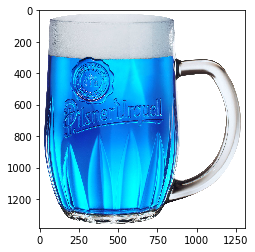

In [639]:
plt.imshow(image)

In [640]:
# what does the image look like?
image.shape

(1384, 1310, 3)

## Level 3 - Performing and Understading Convolutions 

### Question 1 

### Why it has 3 dimensions ?? 

Answer - Because it is having RGB color channel

## Play Around with below code to enhance your understanding of CNN

## Lets create a model with 1 Convolutional layer

### Question 2

### Please fill in the comments 

In [753]:
model = Sequential()
model.add(Convolution2D(3,    # number of _____filters_______
                        (3,    # ____row_______ dimension of kernel 
                        3),    # ____col_______ dimension of kernel
                        input_shape=image.shape))

In [754]:
image_batch = np.expand_dims(image,axis=0)

### Question 3

### What Happens if we dont expand the dims of image ? Why we need to do it ?


Answer - convolution model takes batch of images as input, the bacth can be of 1 image only

In [755]:
image_batch.shape

(1, 1384, 1310, 3)

In [756]:
conv_image = model.predict(image_batch)

In [781]:
conv_image.shape

(1, 1382, 1308, 3)

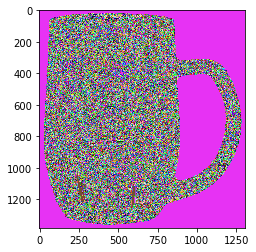

In [758]:
plt.imshow(np.squeeze(conv_image, axis=0))

In [678]:
def visualize_image(model, image):

    image_batch = np.expand_dims(image,axis=0)
    conv_image = model.predict(image_batch)
    
    # here we get rid of that added dimension and plot the image
    conv_image = np.squeeze(conv_image, axis=0)
    
    print (conv_image.shape)
    plt.imshow(conv_image)

(1382, 1308, 3)


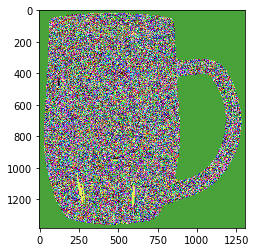

In [679]:
visualize_image(model, image)

## Level 4 - Use Your Conv Function to visualize the image

### Question 1 - Call your function to perform conv and plot the image obatined 

In [759]:
image.shape

(1384, 1310, 3)

In [760]:
image2.shape

(3, 1384, 1310)

In [761]:
x,y,z = image.shape
image2 = image.reshape(z,x,y)

In [773]:
filters = np.random.rand(3,3,3,3)

In [774]:
filters.shape

(3, 3, 3, 3)

In [775]:
im = convolve_3d_layer(image2, filters, 1, 1, [1,0,1])

In [813]:
p = np.array(im)

In [787]:
p = np.array(im)
x,y,z = p.shape
p = p.reshape(z,y,x)

In [814]:
p.shape

(3, 1382, 1308)

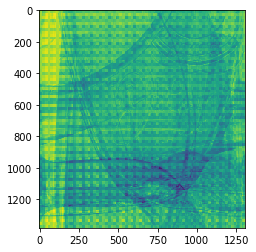

In [823]:
plt.imshow(p[2])

## 10x10 Kernel Convimage

(1375, 1301, 3)


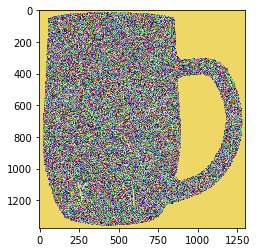

In [680]:
model = Sequential()
model.add(Convolution2D(3,    
                        (10,    
                        10),    
                        input_shape=image.shape))


visualize_image(model, image)

## Level 5

### Question 1

### What difference you notice between 3\*3 and 10\*10 kernel size ? 

Answer - 

### Question 2

### What is the reason behing this difference ?

Answer -

# Play around with code below, to enhance your understading

## Another image Vis 

In [681]:
# Note: matplot lib is pretty inconsistent with how it plots these weird image arrays.

def nice_image_printer(model, image):
    '''prints the image as a 2d array'''
    image_batch = np.expand_dims(image,axis=0)
    conv_image2 = model.predict(image_batch)

    conv_image2 = np.squeeze(conv_image2, axis=0)
    print (conv_image2.shape)
    conv_image2 = conv_image2.reshape(conv_image2.shape[:2])

    print (conv_image2.shape)
    plt.imshow(conv_image2)

In [682]:
model = Sequential()
model.add(Convolution2D(1,    
                        (3,    
                        3),    
                        input_shape=image.shape))

(1382, 1308, 1)
(1382, 1308)


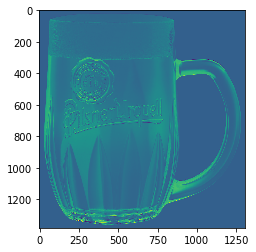

In [683]:
nice_image_printer(model, image)

### Question 3

### Why this image is different from previous one ?

Answer

## Increase the kernal size

(1370, 1296, 1)
(1370, 1296)


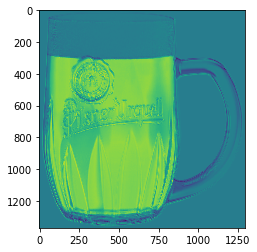

In [20]:
# 15x15 kernel size
model = Sequential()
model.add(Convolution2D(1,    
                        (15,    
                        15),   
                        input_shape=image.shape))

nice_image_printer(model, image)

## Adding a Relu Activation

In [26]:
model = Sequential()
model.add(Convolution2D(1,    
                        (3,    
                        3),    
                        input_shape=image.shape))
# Lets add a new activation layer!
model.add(Activation('relu'))



(1382, 1308, 1)
(1382, 1308)


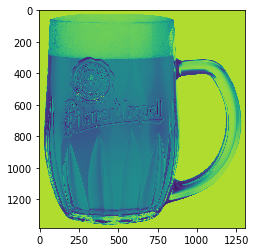

In [27]:
nice_image_printer(model, image)

## Adding a Max pool After Relu

(276, 261, 3)


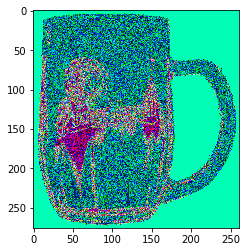

In [28]:
model = Sequential()
model.add(Convolution2D(3,    
                        (3,    
                        3),    
                        input_shape=image.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

visualize_image(model, image)